<a href="https://colab.research.google.com/github/Marya1ZZ/UofT_ML_Datathon3/blob/main/Cal_Robinson_Datathon_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import warnings
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import TargetEncoder
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import statsmodels.api as sm
from scipy.stats import boxcox

# importing PyTorch library as 't' for convenience
import torch as t

# importing other necessary libraries
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

warnings.filterwarnings('ignore')

**Import dataset**

In [ ]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()

data = pd.read_csv('Datathon #3 Dataset - HAD7001.csv')

Saving Datathon #3 Dataset - HAD7001.csv to Datathon #3 Dataset - HAD7001.csv


**Data exploratation**

In [ ]:
data
print(data.dtypes)
data.head(n=10)

encounter_id                     int64
patient_id                       int64
hospital_id                      int64
hospital_death                   int64
age                            float64
                                ...   
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
Length: 186, dtype: object


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,33181,74489,83,0,67.0,27.56,0,Caucasian,M,190.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,82208,49526,83,0,59.0,57.45,0,Caucasian,F,165.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
7,120995,50129,33,0,70.0,NaN,0,Caucasian,M,165.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8,80471,10577,118,1,45.0,NaN,0,Caucasian,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,42871,90749,118,0,50.0,25.71,0,NaN,M,175.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [ ]:
pd.crosstab(data['hospital_death'], columns='count')

col_0,count
hospital_death,
0,83798
1,7915


**Restricting to analysis variables**

In [ ]:
data = data[['age','bmi','ethnicity','gender','readmission_status','icu_type','gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache','gcs_unable_apache','ventilated_apache','d1_spo2_min','d1_sysbp_max','d1_sysbp_min','d1_heartrate_max','d1_temp_max','arf_apache','fio2_apache','d1_bun_max','d1_creatinine_max','d1_glucose_max','d1_hco3_min','d1_inr_max','d1_lactate_max','immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis','hepatic_failure','hospital_death']]

In [ ]:
data
print(data.dtypes)
data.head(n=10)

age                            float64
bmi                            float64
ethnicity                       object
gender                          object
readmission_status               int64
icu_type                        object
gcs_eyes_apache                float64
gcs_motor_apache               float64
gcs_verbal_apache              float64
gcs_unable_apache              float64
ventilated_apache              float64
d1_spo2_min                    float64
d1_sysbp_max                   float64
d1_sysbp_min                   float64
d1_heartrate_max               float64
d1_temp_max                    float64
arf_apache                     float64
fio2_apache                    float64
d1_bun_max                     float64
d1_creatinine_max              float64
d1_glucose_max                 float64
d1_hco3_min                    float64
d1_inr_max                     float64
d1_lactate_max                 float64
immunosuppression              float64
leukemia                 

,age,bmi,ethnicity,gender,readmission_status,icu_type,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,gcs_unable_apache,...,d1_glucose_max,d1_hco3_min,d1_inr_max,d1_lactate_max,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hepatic_failure,hospital_death
0,68.0,22.73,Caucasian,M,0,CTICU,3.0,6.0,4.0,0.0,...,168.0,15.0,NaN,1.3,0.0,0.0,0.0,0.0,0.0,0
1,77.0,27.42,Caucasian,F,0,Med-Surg ICU,1.0,3.0,1.0,0.0,...,145.0,26.0,1.3,3.5,0.0,0.0,0.0,0.0,0.0,0
2,25.0,31.95,Caucasian,F,0,Med-Surg ICU,3.0,6.0,5.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0
3,81.0,22.64,Caucasian,F,0,CTICU,4.0,6.0,5.0,0.0,...,185.0,NaN,1.6,NaN,0.0,0.0,0.0,0.0,0.0,0
4,19.0,NaN,Caucasian,M,0,Med-Surg ICU,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0
5,67.0,27.56,Caucasian,M,0,Med-Surg ICU,4.0,6.0,5.0,0.0,...,156.0,27.0,1.1,NaN,0.0,0.0,0.0,0.0,0.0,0
6,59.0,57.45,Caucasian,F,0,Med-Surg ICU,4.0,6.0,5.0,0.0,...,197.0,30.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0
7,70.0,NaN,Caucasian,M,0,Med-Surg ICU,4.0,6.0,5.0,0.0,...,129.0,29.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0
8,45.0,NaN,Caucasian,M,0,CCU-CTICU,4.0,6.0,5.0,0.0,...,365.0,23.0,1.2,5.9,0.0,0.0,0.0,0.0,0.0,1
9,50.0,25.71,NaN,M,0,CCU-CTICU,4.0,6.0,5.0,0.0,...,134.0,28.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0


**Missing data**

In [ ]:
missing_data = print(data.isna())
missing_count = data.isna().sum()
print(missing_count)

         age    bmi  ethnicity  gender  readmission_status  icu_type  \
0      False  False      False   False               False     False   
1      False  False      False   False               False     False   
2      False  False      False   False               False     False   
3      False  False      False   False               False     False   
4      False   True      False   False               False     False   
...      ...    ...        ...     ...                 ...       ...   
91708  False  False      False   False               False     False   
91709  False  False      False   False               False     False   
91710  False  False      False   False               False     False   
91711   True  False      False   False               False     False   
91712  False  False      False   False               False     False   

       gcs_eyes_apache  gcs_motor_apache  gcs_verbal_apache  \
0                False             False              False   
1        

**Data class imbalance and distributions for outliers**

Class imbalance in 'gender':
gender
M    0.539536
F    0.460464
Name: proportion, dtype: float64


Class imbalance in 'ethnicity':
ethnicity
Caucasian           0.782613
African American    0.105704
Other/Unknown       0.048429
Hispanic            0.042029
Asian               0.012500
Native American     0.008725
Name: proportion, dtype: float64


Class imbalance in 'icu_type':
icu_type
Med-Surg ICU    0.551568
MICU            0.083903
Neuro ICU       0.083685
CCU-CTICU       0.078026
SICU            0.056797
Cardiac ICU     0.052075
CSICU           0.050298
CTICU           0.043647
Name: proportion, dtype: float64


Class imbalance in 'ventilated_apache':
ventilated_apache
0.0    0.674279
1.0    0.325721
Name: proportion, dtype: float64


Class imbalance in 'arf_apache':
arf_apache
0.0    0.972021
1.0    0.027979
Name: proportion, dtype: float64


Class imbalance in 'immunosuppression':
immunosuppression
0.0    0.973835
1.0    0.026165
Name: proportion, dtype: float64


Class imbalanc

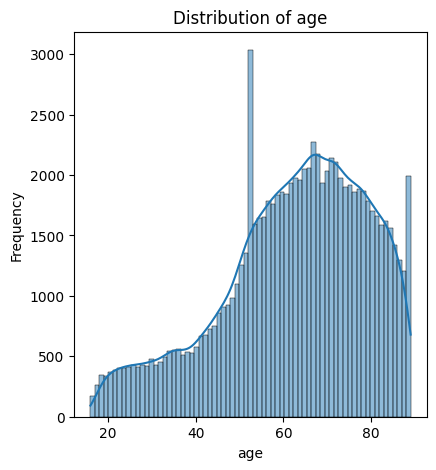

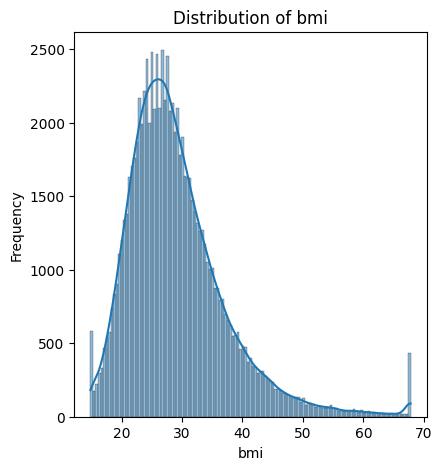

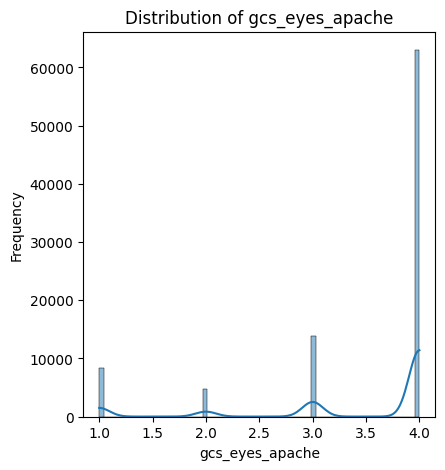

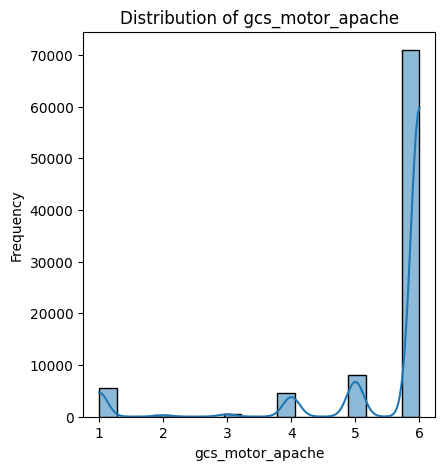

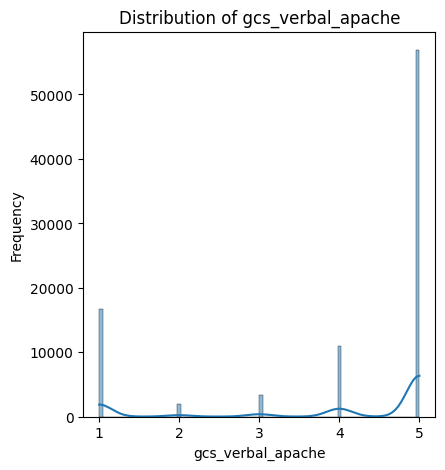

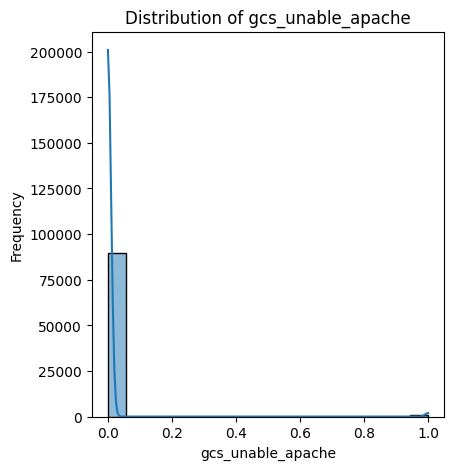

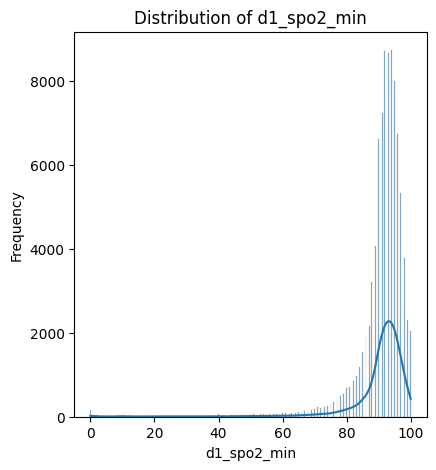

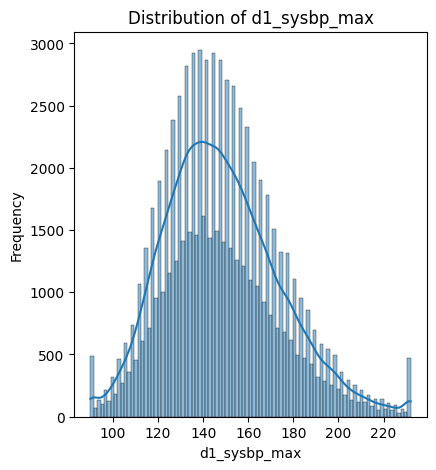

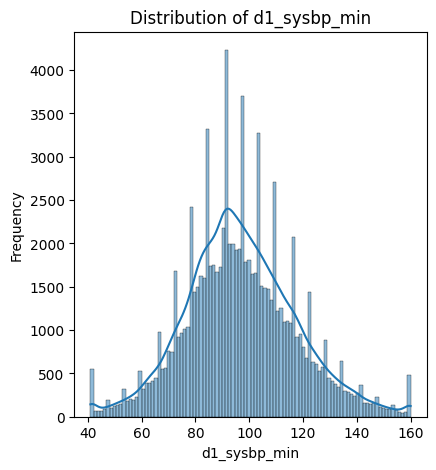

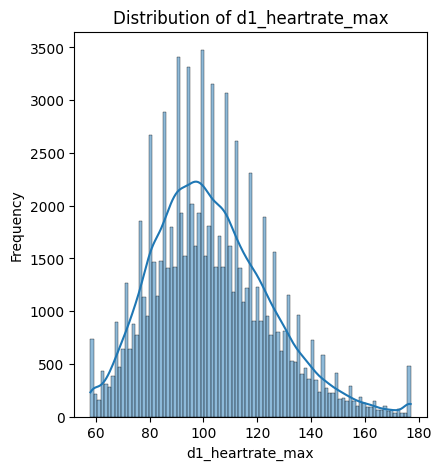

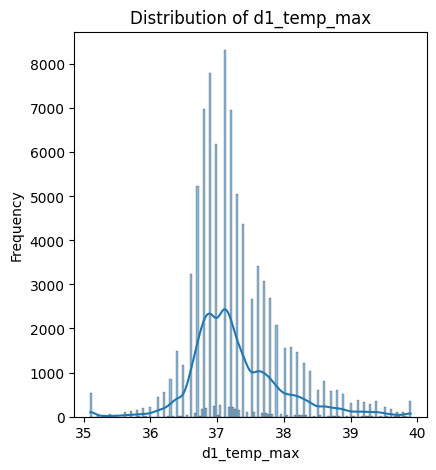

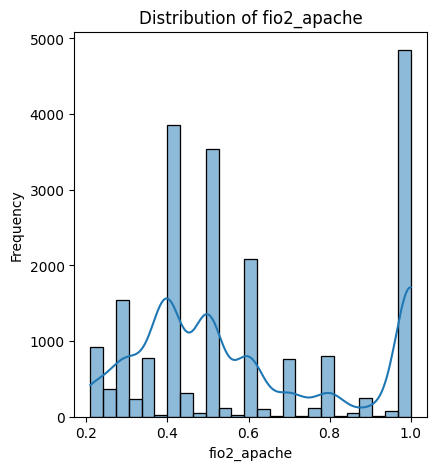

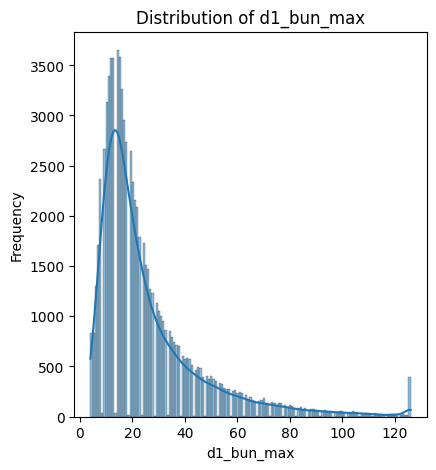

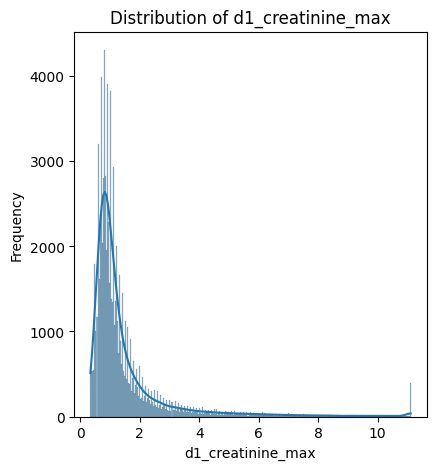

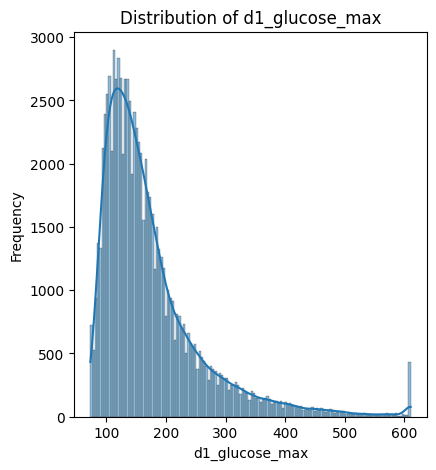

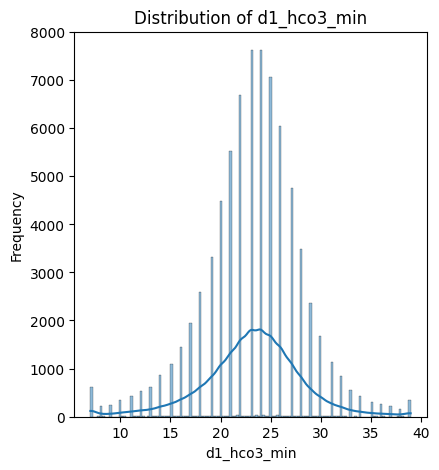

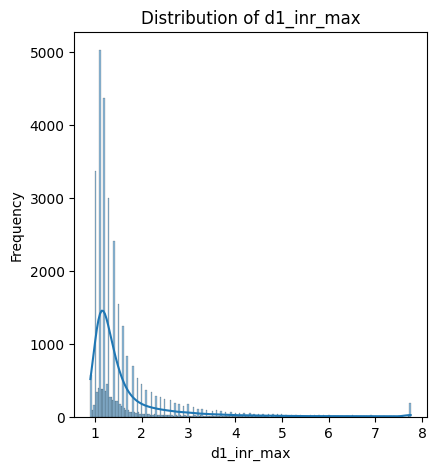

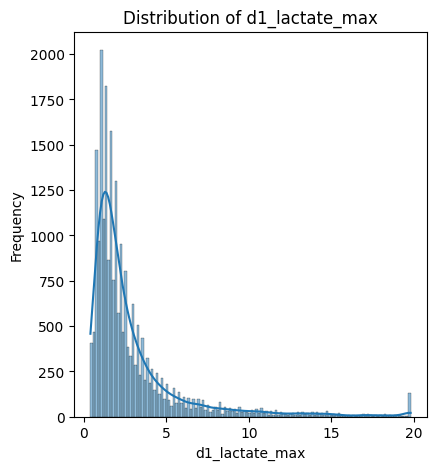

<Figure size 800x600 with 0 Axes>

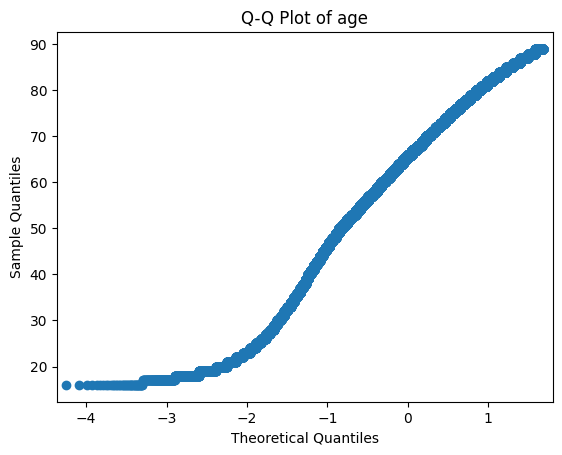

<Figure size 800x600 with 0 Axes>

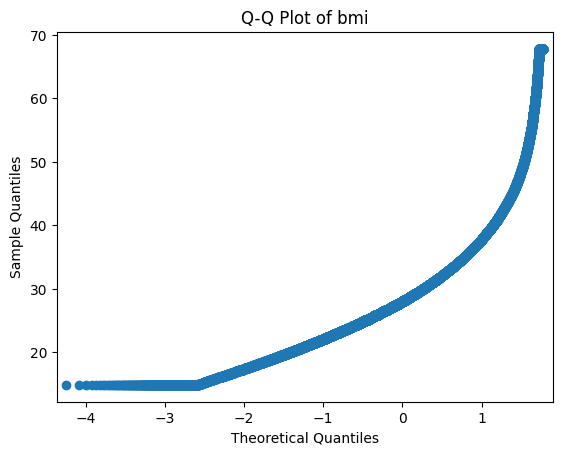

<Figure size 800x600 with 0 Axes>

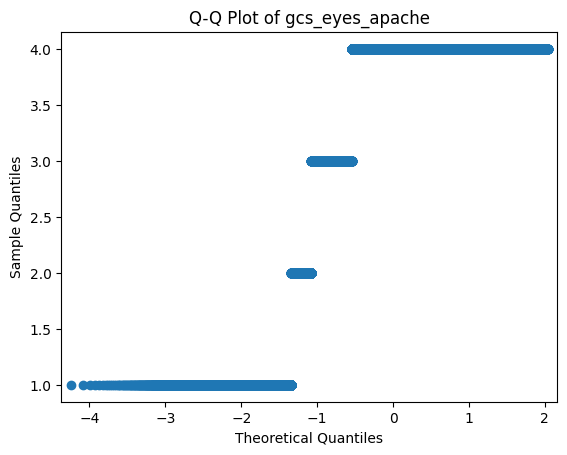

<Figure size 800x600 with 0 Axes>

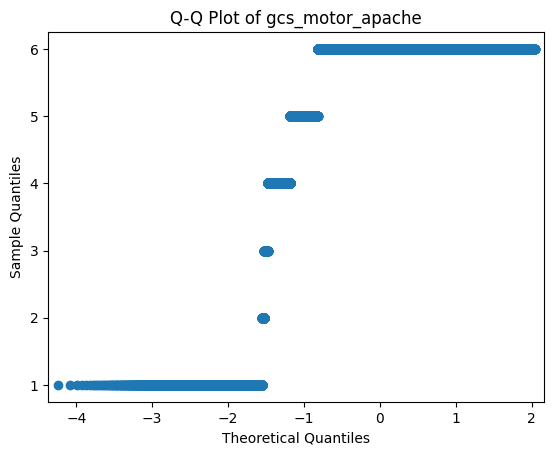

<Figure size 800x600 with 0 Axes>

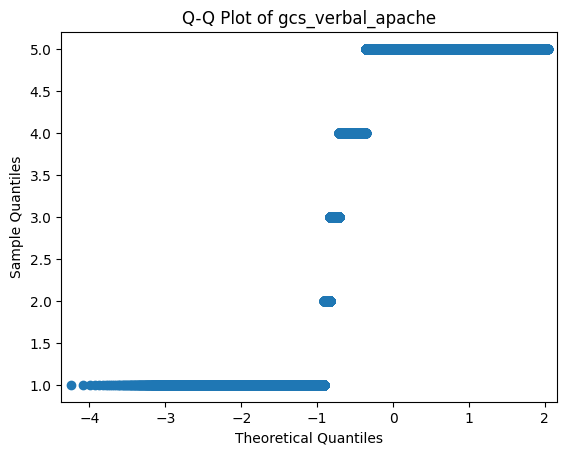

<Figure size 800x600 with 0 Axes>

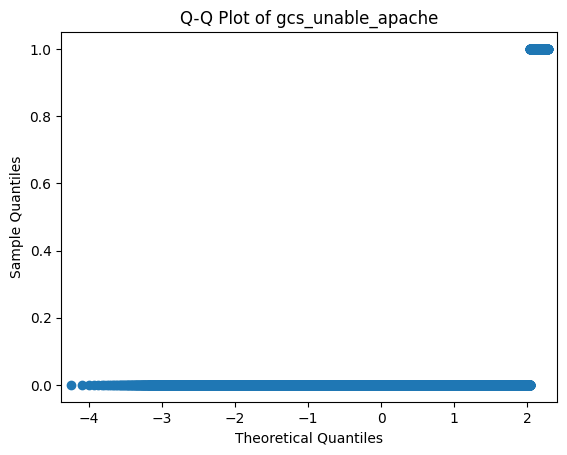

<Figure size 800x600 with 0 Axes>

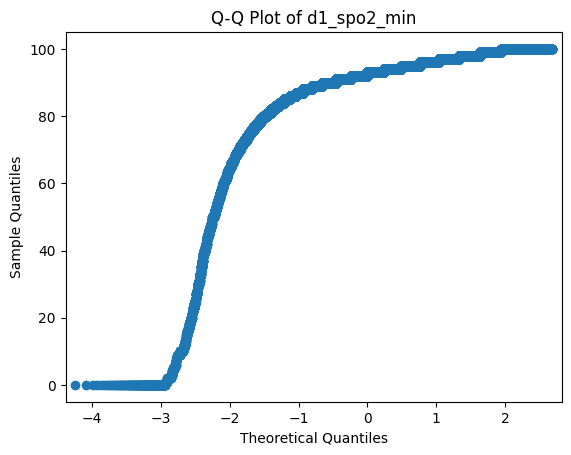

<Figure size 800x600 with 0 Axes>

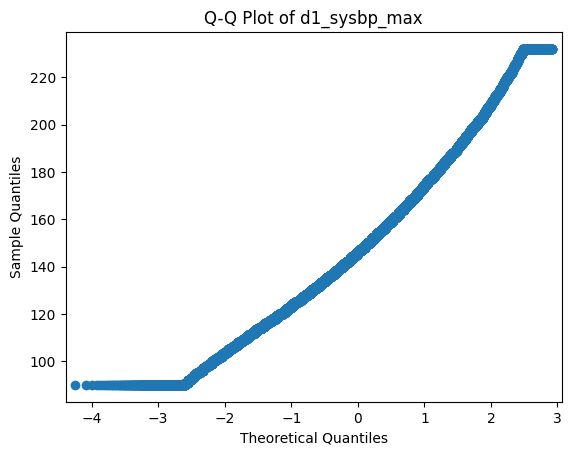

<Figure size 800x600 with 0 Axes>

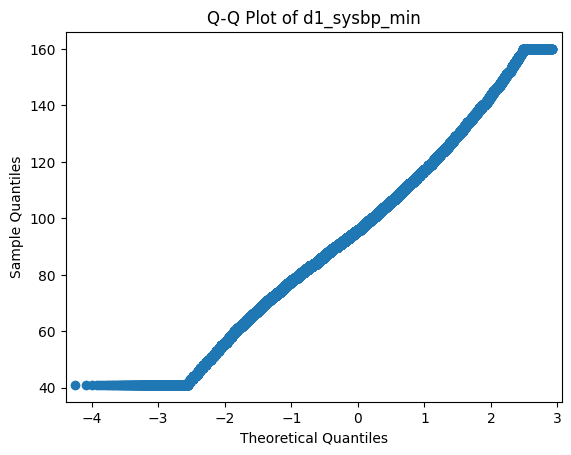

<Figure size 800x600 with 0 Axes>

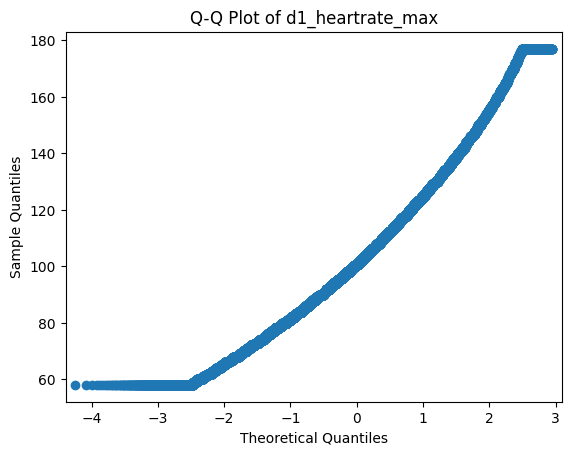

<Figure size 800x600 with 0 Axes>

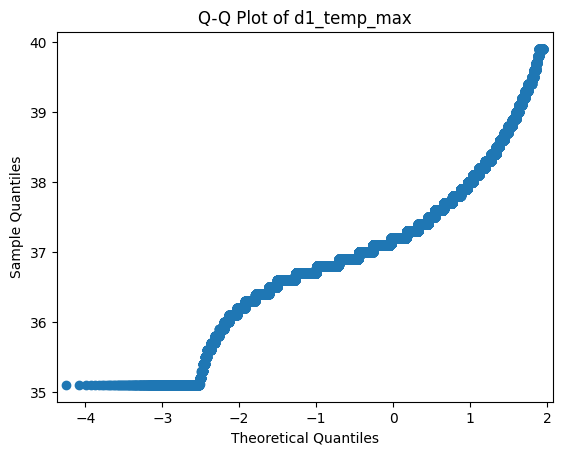

<Figure size 800x600 with 0 Axes>

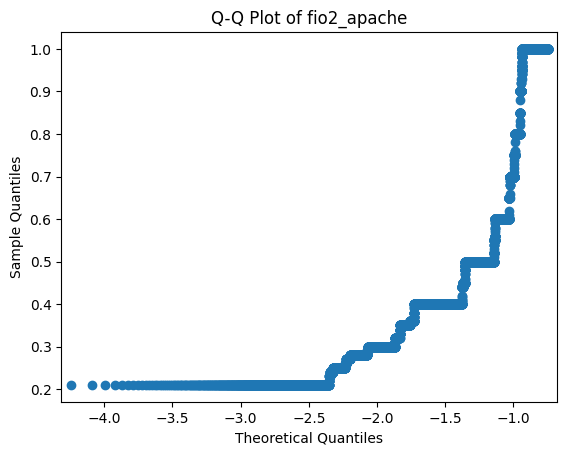

<Figure size 800x600 with 0 Axes>

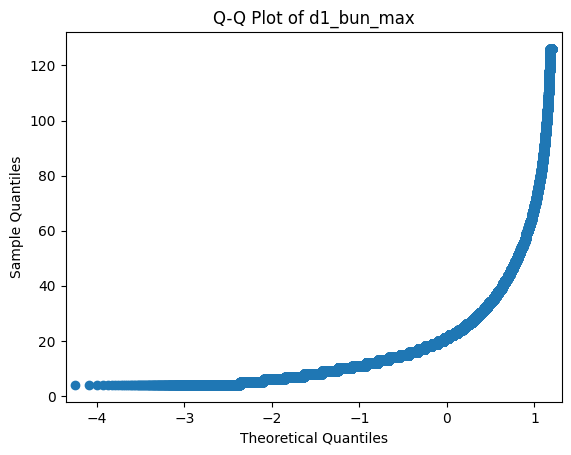

<Figure size 800x600 with 0 Axes>

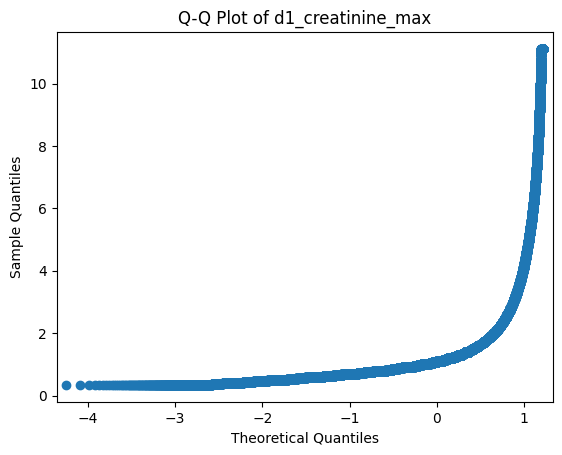

<Figure size 800x600 with 0 Axes>

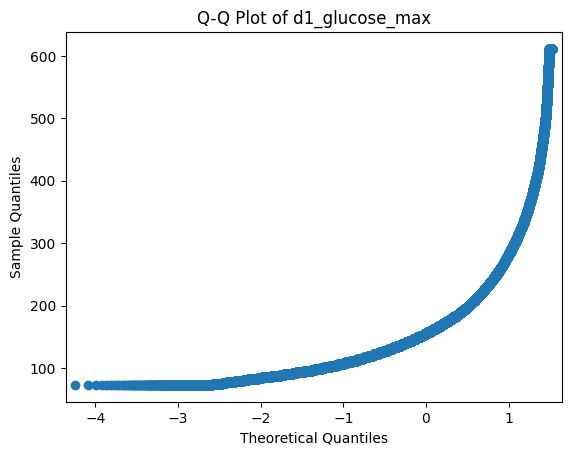

<Figure size 800x600 with 0 Axes>

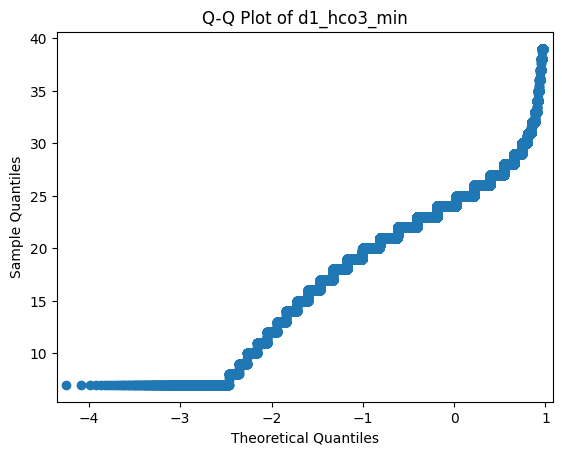

<Figure size 800x600 with 0 Axes>

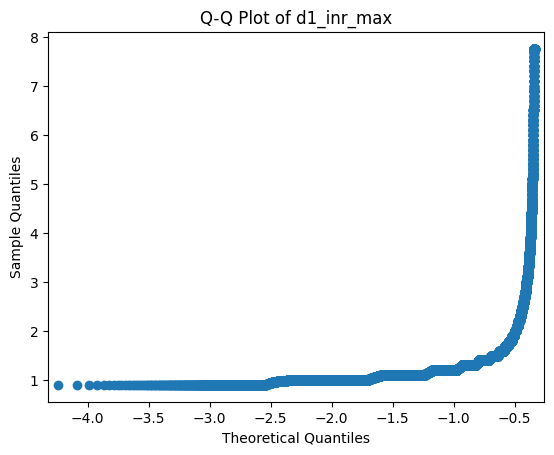

<Figure size 800x600 with 0 Axes>

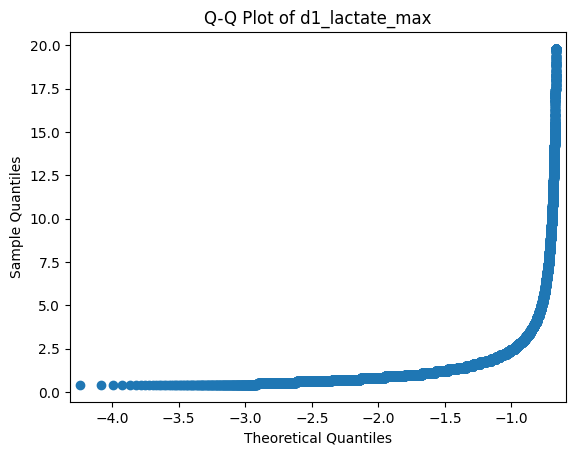

In [ ]:
# Check for class imbalance for categorical variables
def check_class_imbalance(data, target_variable):
  class_counts = data[target_variable].value_counts(normalize=True)
  return class_counts

categorical_vars = ['gender', 'ethnicity', 'icu_type', 'ventilated_apache', 'arf_apache', 'immunosuppression', 'leukemia','lymphoma','solid_tumor_with_metastasis','hepatic_failure']


# Loop through all variables and check for class imbalance
for variable in categorical_vars:
    try:
        imbalance_report = check_class_imbalance(data, variable)
        print(f"Class imbalance in '{variable}':")
        print(imbalance_report)
        print("\n")  # Add a separator between variables
    except KeyError:
        print(f"Variable '{variable}' skipped (likely not categorical).")
        print("\n")

# Assess distribution of continuous variables
continuous_vars = ['age','bmi','gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache','gcs_unable_apache','d1_spo2_min','d1_sysbp_max','d1_sysbp_min','d1_heartrate_max','d1_temp_max','fio2_apache','d1_bun_max','d1_creatinine_max','d1_glucose_max','d1_hco3_min','d1_inr_max','d1_lactate_max',]

for var in continuous_vars:
    plt.figure(figsize=(10, 5))  # Adjust figure size if needed

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[var], kde=True)  # kde adds a kernel density estimate
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

# Assess distribution of residuals
for var in continuous_vars:
    plt.figure(figsize=(8, 6))

    # Q-Q plot
    sm.qqplot(data[var], line='s')  # 's' for standardized line
    plt.title(f'Q-Q Plot of {var}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')

    plt.show()

**Descriptive data**

Overall cohort

In [ ]:
print(data.describe())

                age           bmi  readmission_status  gcs_eyes_apache  \
count  87485.000000  88284.000000             91713.0     89812.000000   
mean      62.309516     29.185818                 0.0         3.465049   
std       16.775119      8.275142                 0.0         0.951715   
min       16.000000     14.844926                 0.0         1.000000   
25%       52.000000     23.641975                 0.0         3.000000   
50%       65.000000     27.654655                 0.0         4.000000   
75%       75.000000     32.930206                 0.0         4.000000   
max       89.000000     67.814990                 0.0         4.000000   

       gcs_motor_apache  gcs_verbal_apache  gcs_unable_apache  \
count      89812.000000       89812.000000       90676.000000   
mean           5.471195           3.994778           0.009528   
std            1.288376           1.560166           0.097148   
min            1.000000           1.000000           0.000000   
25%     

Convert features to numerical

In [ ]:
print(data.dtypes)

age                            float64
bmi                            float64
ethnicity                       object
gender                          object
readmission_status               int64
icu_type                        object
gcs_eyes_apache                float64
gcs_motor_apache               float64
gcs_verbal_apache              float64
gcs_unable_apache              float64
ventilated_apache              float64
d1_spo2_min                    float64
d1_sysbp_max                   float64
d1_sysbp_min                   float64
d1_heartrate_max               float64
d1_temp_max                    float64
arf_apache                     float64
fio2_apache                    float64
d1_bun_max                     float64
d1_creatinine_max              float64
d1_glucose_max                 float64
d1_hco3_min                    float64
d1_inr_max                     float64
d1_lactate_max                 float64
immunosuppression              float64
leukemia                 

In [ ]:
data['ethnicity'] = pd.Categorical(data.ethnicity)
data['ethnicity'] = data.ethnicity.cat.codes

In [ ]:
# Replace -1 values in 'ethnicity' with 6
data['ethnicity'] = data['ethnicity'].replace(-1, 6)

In [ ]:
data['icu_type'] = pd.Categorical(data.icu_type)
data['icu_type'] = data.icu_type.cat.codes

In [ ]:
data['gender'] = pd.Categorical(data.gender)
data['gender'] = data.gender.cat.codes

In [ ]:
data = data.drop('readmission_status', axis=1)

**Feature correlation**

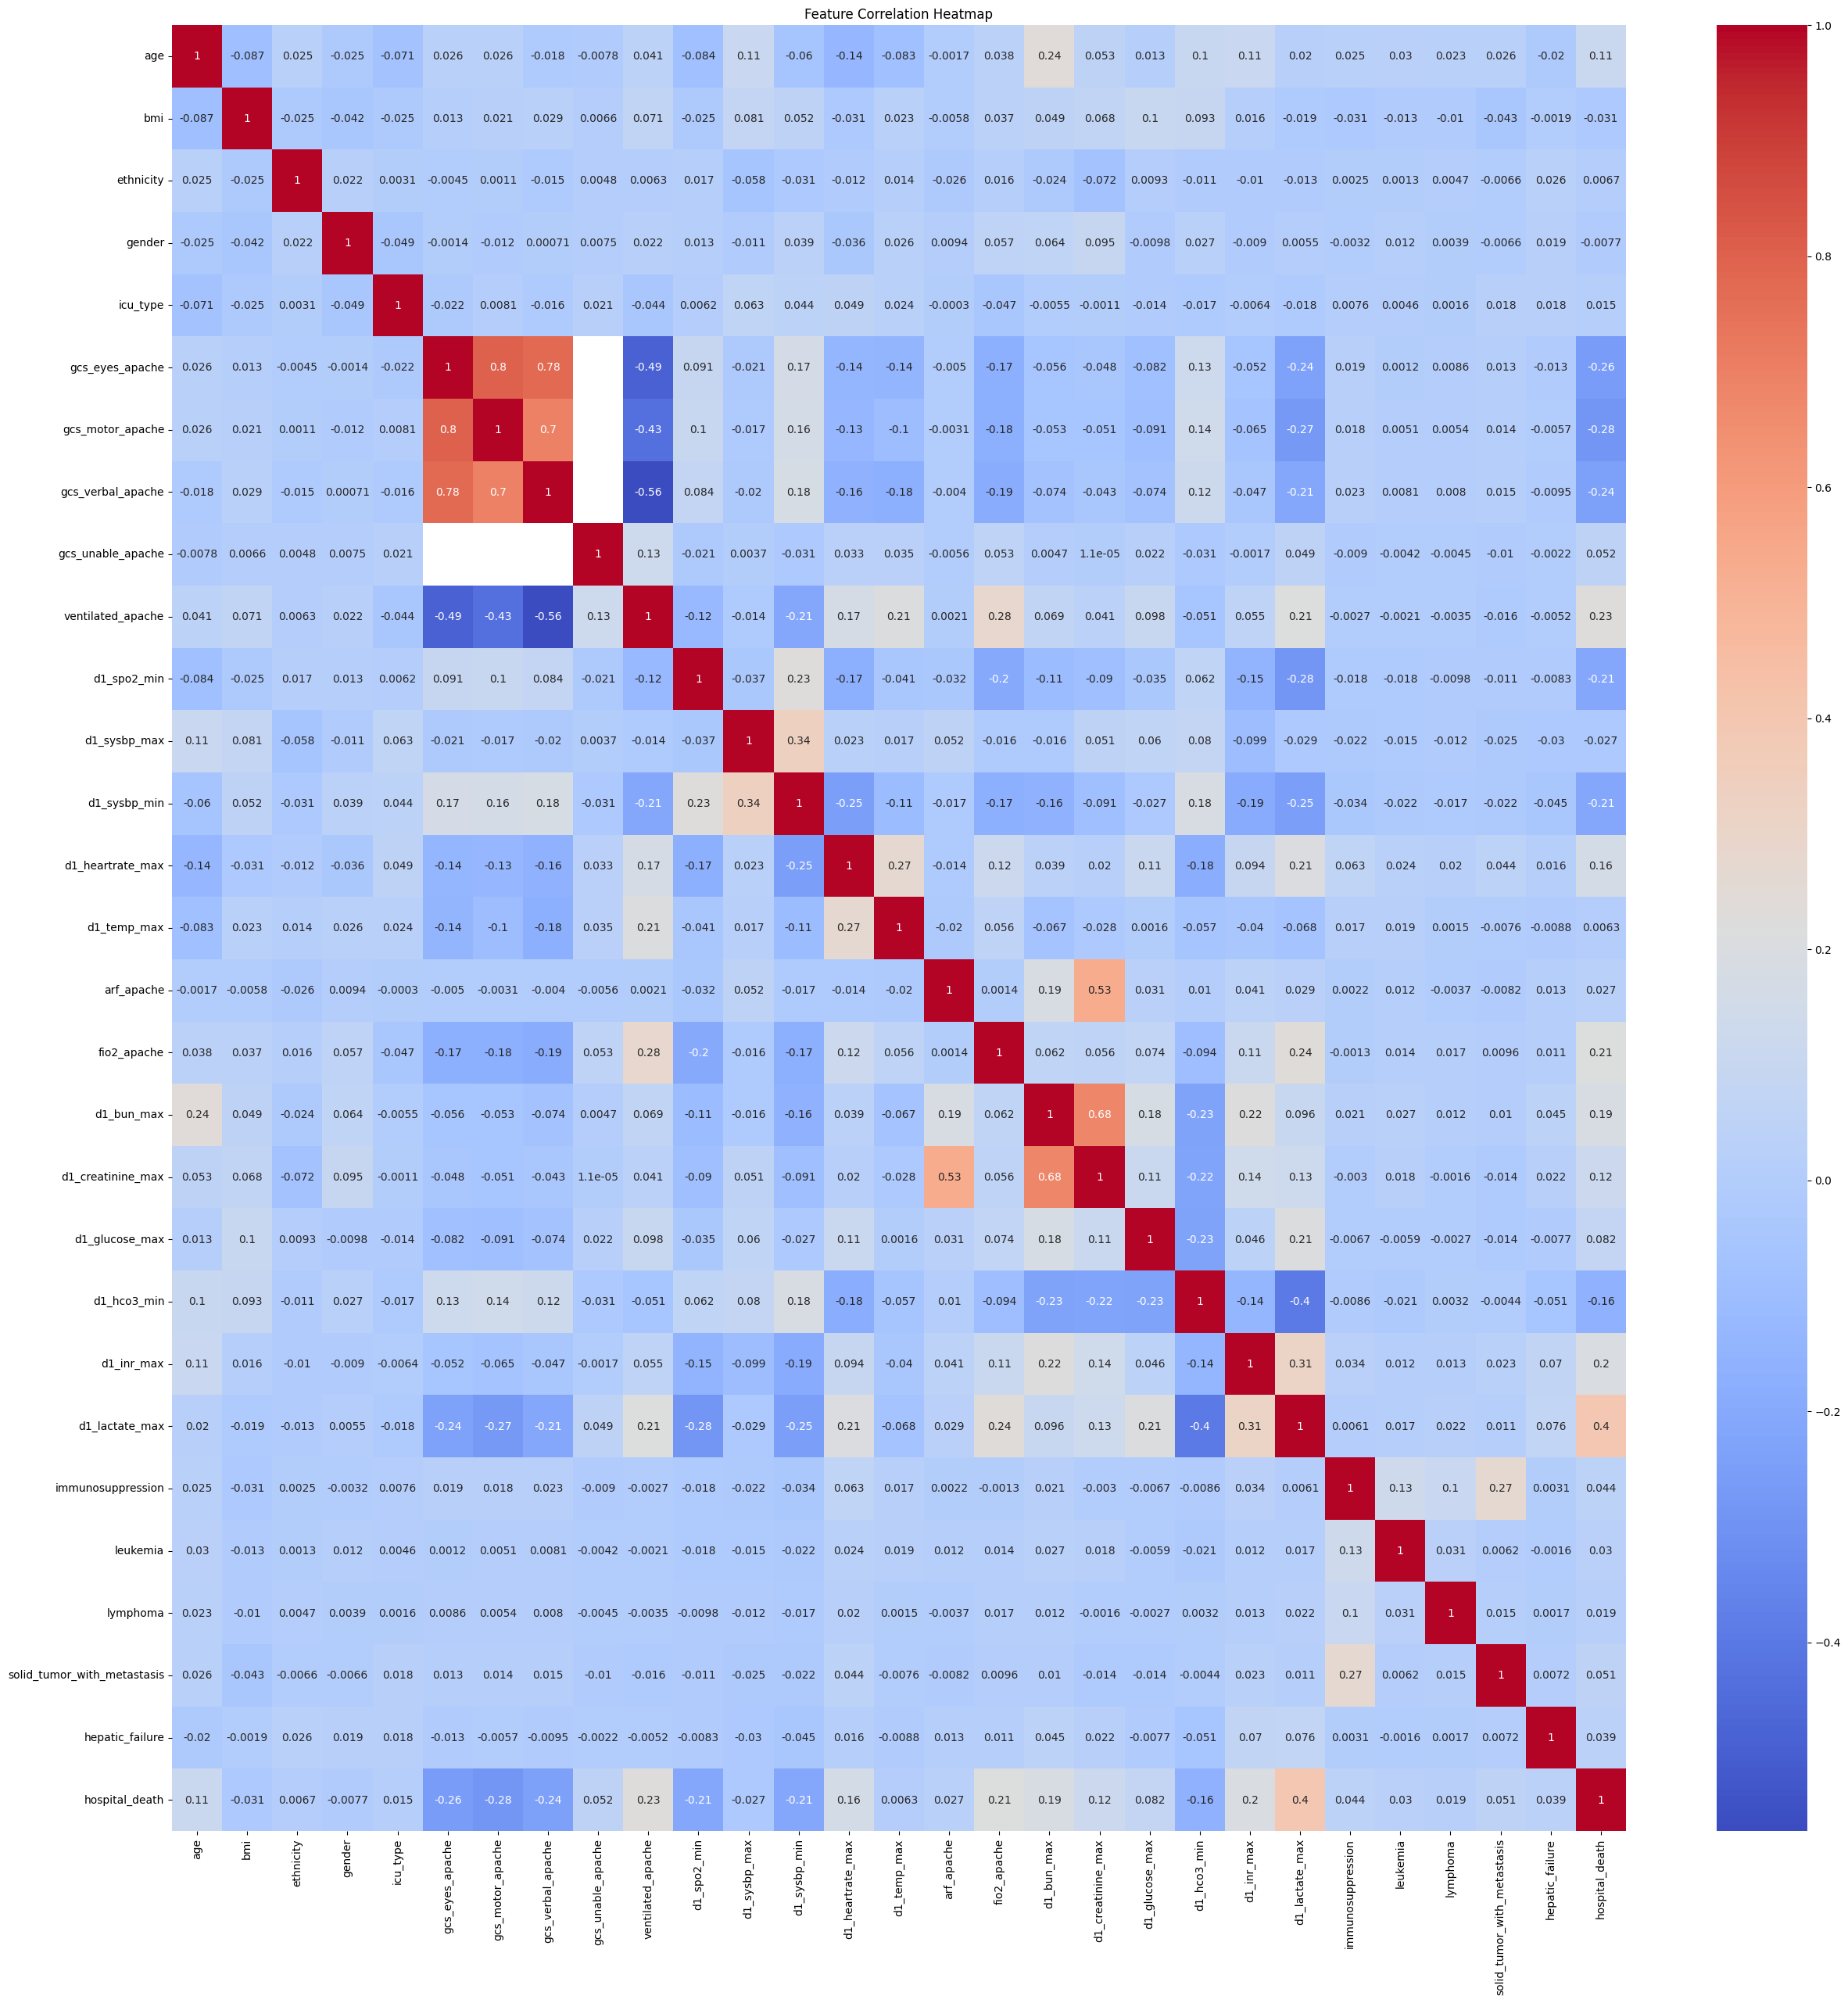

In [ ]:
corr_data = pd.DataFrame(data, columns=['age','bmi','ethnicity','gender','icu_type','gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache','gcs_unable_apache','ventilated_apache','d1_spo2_min','d1_sysbp_max','d1_sysbp_min','d1_heartrate_max','d1_temp_max','arf_apache','fio2_apache','d1_bun_max','d1_creatinine_max','d1_glucose_max','d1_hco3_min','d1_inr_max','d1_lactate_max','immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis','hepatic_failure','hospital_death'])

plt.figure(figsize=(30,30))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

**Data preparation for analysis**

In [ ]:
list(data.columns)

['age',
 'bmi',
 'ethnicity',
 'gender',
 'icu_type',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_verbal_apache',
 'gcs_unable_apache',
 'ventilated_apache',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_heartrate_max',
 'd1_temp_max',
 'arf_apache',
 'fio2_apache',
 'd1_bun_max',
 'd1_creatinine_max',
 'd1_glucose_max',
 'd1_hco3_min',
 'd1_inr_max',
 'd1_lactate_max',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'hepatic_failure',
 'hospital_death']

Splitting into training and testing sets

In [ ]:
# Randomly sample 70% of the data for training
train_data = data.sample(frac = 0.7, random_state=10)

# Use the remaining 30% for testing
test_data = data.drop(train_data.index)

# Check the mean of the 'DEATH_EVENT' column in both training and testing data
print(train_data['hospital_death'].mean())
print(test_data['hospital_death'].mean())

0.08616956650415115
0.086610452860362


In [ ]:
# Extract the hospital_death column as the target variable for training and testing
Y_train = train_data['hospital_death'].to_numpy()
Y_test = test_data['hospital_death'].to_numpy()

# Extract the features (excluding 'hospital_death') for training and testing
X_train = train_data.drop('hospital_death', axis=1).to_numpy()
X_test = test_data.drop('hospital_death', axis=1).to_numpy()

In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=1)

In [ ]:
imputer1=imputer.fit(X_train)
X_train = imputer1.transform(X_train)

In [ ]:
imputer2=imputer.fit(X_test)
X_test = imputer2.transform(X_test)

In [ ]:
# Standardize the features to have zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Neural network**

Initializing neural network

In [ ]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 5
hidden_units_layer_2 = 5

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((28, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)

Forward pass

In [ ]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out

Training utilities

In [ ]:
# Convert the training data to PyTorch tensors
X = t.Tensor(X_train).type(t.float32)
Y = t.Tensor(Y_train).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 50
learning_rate = 0.01
batch_size = 32

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

Training loop

In [ ]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 10 epochs
    if epoch % 10 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1), Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Training loss

Text(0, 0.5, 'loss')

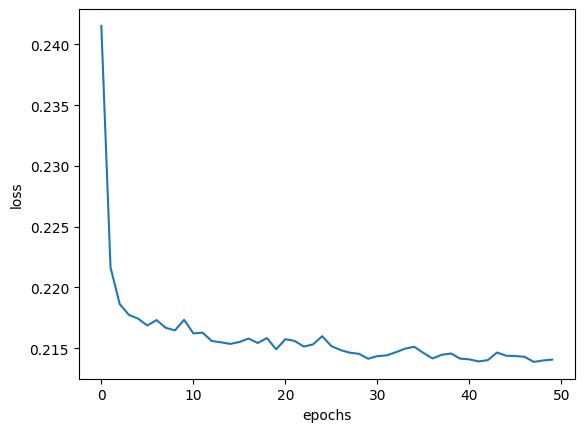

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')

Model performance on validation dataset

In [ ]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_test).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_test).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs1 = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs1.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs2 = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs2.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

0.21944206953048706
0.21197392046451569


In [ ]:
import torch as t
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import Sequential, Linear, Tanh, Sigmoid
from torch.optim import Adam
from torch.nn import BCELoss
import matplotlib.pyplot as plt

# Defining the parameters
number_of_input_features = 28
number_of_hidden_units = 5
epochs = 200
learning_rate = 0.01
batch_size = 32
patience = 20 # adding a new hyperparameter for early stopping

# Loading and preprocessing the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# setting things up for early stopping
best_val_loss = float('inf')
trigger_times = 0

# Creating a neural network model
model = Sequential(
    Linear(number_of_input_features, number_of_hidden_units),
    Tanh(),
    Linear(number_of_hidden_units, 1),
    Sigmoid()
)

# Setting up the optimizer and loss function
optimizer = Adam(model.parameters(), lr=learning_rate)
loss_fn = BCELoss()

# Lists to store accuracy values during training
train_accuracy_list = []
validation_accuracy_list = []

# Main training loop
for epoch in range(epochs):
    # Learning rate scheduling (optional)
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        probs = model(X)

        # new loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y)

        per_epoch_loss_list.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with t.no_grad():
        # Calculate accuracy on train data
        model.eval()
        probs = model(X_train_tensor)
        prediction = (probs >= .5).type(t.LongTensor).view(-1)

        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs > .5).type(t.LongTensor).view(-1)
        val_loss = loss_fn(probs.view(-1), Y_test_tensor).item() # validation loss

        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy : {train_accuracy} , validation_accuracy : {validation_accuracy}')
        model.train()
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            trigger_times = 0  # Reset trigger counter if validation loss improved
        else:
            trigger_times += 1
            if trigger_times >= patience:
                print(f'Early stopping at epoch {epoch} due to no improvement in validation loss.')
                break

epoch 0/200 ---> train_accuracy : 0.921120285987854 , validation_accuracy : 0.9206949472427368
epoch 1/200 ---> train_accuracy : 0.9243445992469788 , validation_accuracy : 0.9228392839431763
epoch 2/200 ---> train_accuracy : 0.9241732954978943 , validation_accuracy : 0.9219306707382202
epoch 3/200 ---> train_accuracy : 0.9238772988319397 , validation_accuracy : 0.9212400913238525
epoch 4/200 ---> train_accuracy : 0.9240953922271729 , validation_accuracy : 0.9215672016143799
epoch 5/200 ---> train_accuracy : 0.9236125349998474 , validation_accuracy : 0.9222577810287476
epoch 6/200 ---> train_accuracy : 0.9242823123931885 , validation_accuracy : 0.9192047715187073
epoch 7/200 ---> train_accuracy : 0.9235034584999084 , validation_accuracy : 0.9219306707382202
epoch 8/200 ---> train_accuracy : 0.9241109490394592 , validation_accuracy : 0.9217125773429871
epoch 9/200 ---> train_accuracy : 0.9226934909820557 , validation_accuracy : 0.921785295009613
epoch 10/200 ---> train_accuracy : 0.92386

Text(0, 0.5, 'Accuracy')

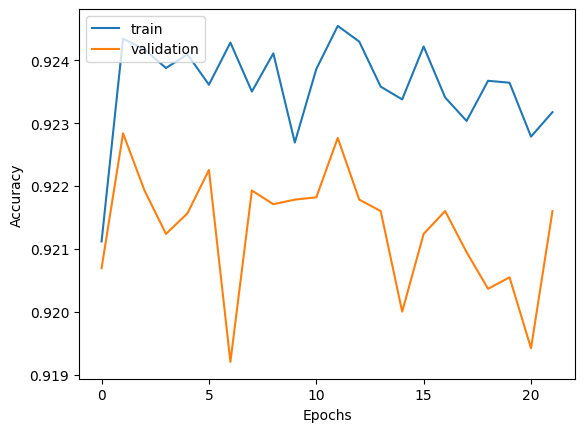

In [ ]:
# Plotting the training and validation accuracy
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label='validation')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Model performance metrics

Accuracy: 0.9218943083521116
AUC-ROC: 0.8512118529956323
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     25131
           1       0.63      0.24      0.34      2383

    accuracy                           0.92     27514
   macro avg       0.78      0.61      0.65     27514
weighted avg       0.91      0.92      0.91     27514

Confusion Matrix:
[[24801   330]
 [ 1819   564]]


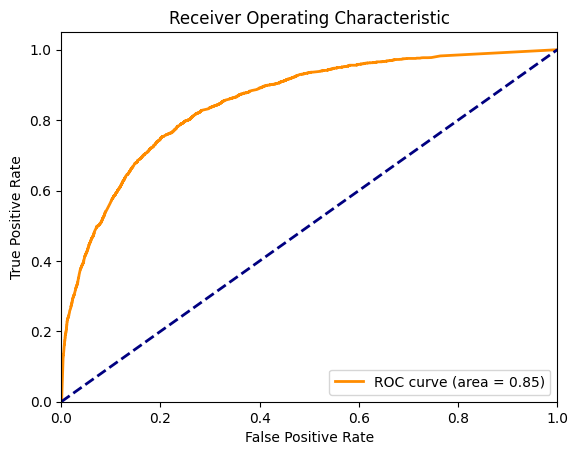

In [ ]:
# Convert probabilities to binary predictions (0 or 1)
preds = (probs1 > 0.5).type(t.int32)

# Calculate accuracy
accuracy = accuracy_score(Y_test, preds)
print(f"Accuracy: {accuracy}")

# Calculate AUC-ROC
auc_roc = roc_auc_score(Y_test, probs1)
print(f"AUC-ROC: {auc_roc}")

# Generate classification report
print(classification_report(Y_test, preds))

# Generate confusion matrix
cm = confusion_matrix(Y_test, preds)
print("Confusion Matrix:")
print(cm)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, probs1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


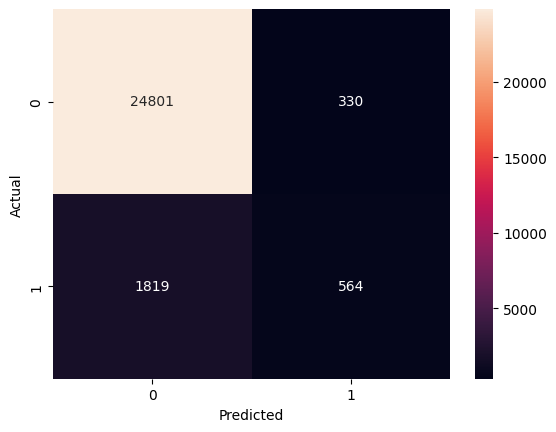

In [ ]:
# Visualizing confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**XGBoost Model**

In [ ]:
!pip install category_encoders
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder

Splitting the dataset

In [ ]:
# create list of numerical, categorical features
target_column = 'hospital_death'

categorical_columns = ['ethnicity', 'gender','icu_type','ventilated_apache','arf_apache','immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis','hepatic_failure']

multinomial_columns = ['gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache','gcs_unable_apache']

numerical_columns = ['age','bmi','d1_spo2_min','d1_sysbp_max','d1_sysbp_min','d1_heartrate_max','d1_temp_max','fio2_apache','d1_bun_max','d1_creatinine_max','d1_glucose_max','d1_hco3_min','d1_inr_max','d1_lactate_max']

In [ ]:
# Splitting the dataset into training and test sets
train_df = data.sample(frac=0.7, random_state=10)
test_df = data.drop(train_df.index)

# Create X_train, Y_train, X_test and Y_test from dataframes, instead of converting to numpy arrays
X_train = train_df.drop('hospital_death', axis=1)
Y_train = train_df['hospital_death']
X_test = test_df.drop('hospital_death', axis=1)
Y_test = test_df['hospital_death']

In [ ]:
# Impute missing data
imputer = IterativeImputer(max_iter=10, random_state=1)
imputer.fit(X_train)
train_df_imp = imputer.transform(X_train)
X_train.loc[:,['age','bmi','ethnicity','gender','icu_type','gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache','gcs_unable_apache','ventilated_apache','d1_spo2_min','d1_sysbp_max','d1_sysbp_min','d1_heartrate_max','d1_temp_max','arf_apache','fio2_apache','d1_bun_max','d1_creatinine_max','d1_glucose_max','d1_hco3_min','d1_inr_max','d1_lactate_max','immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis','hepatic_failure']] = train_df_imp
X_train = pd.DataFrame(train_df_imp, columns=X_train.columns)

imputer.fit(X_test)
test_df_imp = imputer.transform(X_test)
X_test.loc[:,['age','bmi','ethnicity','gender','icu_type','gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache','gcs_unable_apache','ventilated_apache','d1_spo2_min','d1_sysbp_max','d1_sysbp_min','d1_heartrate_max','d1_temp_max','arf_apache','fio2_apache','d1_bun_max','d1_creatinine_max','d1_glucose_max','d1_hco3_min','d1_inr_max','d1_lactate_max','immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis','hepatic_failure']] = test_df_imp
X_test = pd.DataFrame(test_df_imp, columns=X_test.columns)


In [ ]:
# Initialize and define the Gradient Boosting model
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), [c for c in categorical_columns + multinomial_columns])],remainder='passthrough')
sc = StandardScaler(with_mean=False)
xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

model = Pipeline([
    ('pre_process', ct),
    ('scaler', sc),
    ('xg_boost', xgb)
])

In [ ]:
# Training the Gradient Boosting model on the training dataset
model = model.fit(X_train, Y_train)

# Predicting on the training dataset and computing the accuracy
Y_pred = model.predict(X_train)
accuracy_score(Y_train, Y_pred)

# Predicting on the test dataset and computing the accuracy
Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9133168568728647

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Defining the hyperparameters to be tuned using GridSearchCV
param_dist = {
    "xg_boost__n_estimators" : [100, 200],
    "xg_boost__max_depth" : [1, 5],
    "xg_boost__min_samples_leaf" : [25],
    "xg_boost__learning_rate" : [.1,  .2]
}

# Using StratifiedKFold for cross-validation, ensuring each fold has the same proportion of observations with each target value
skf = StratifiedKFold(n_splits=5)

# Setting up the GridSearchCV to find the best hyperparameters for the Gradient Boosting model
random_search = GridSearchCV(
    model, param_grid=param_dist, cv=skf
)

# Fitting the GridSearchCV on the training data
random_search.fit(X_train, Y_train)

# Storing and displaying the results of the grid search
results = pd.DataFrame(random_search.cv_results_)
results[results['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xg_boost__learning_rate,param_xg_boost__max_depth,param_xg_boost__min_samples_leaf,param_xg_boost__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.646739,2.566488,0.019981,0.008318,0.1,1,25,100,"{'xg_boost__learning_rate': 0.1, 'xg_boost__ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,21.161560,3.821269,0.012188,0.002199,0.1,1,25,200,"{'xg_boost__learning_rate': 0.1, 'xg_boost__ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,51.197307,0.373211,0.010502,0.001099,0.1,5,25,100,"{'xg_boost__learning_rate': 0.1, 'xg_boost__ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,102.500494,2.378012,0.010274,0.000036,0.1,5,25,200,"{'xg_boost__learning_rate': 0.1, 'xg_boost__ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,9.227841,0.321950,0.010449,0.000763,0.2,1,25,100,"{'xg_boost__learning_rate': 0.2, 'xg_boost__ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,18.085163,0.392492,0.010736,0.001930,0.2,1,25,200,"{'xg_boost__learning_rate': 0.2, 'xg_boost__ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,50.037859,0.218485,0.009950,0.000062,0.2,5,25,100,"{'xg_boost__learning_rate': 0.2, 'xg_boost__ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,97.817834,0.747577,0.010382,0.000597,0.2,5,25,200,"{'xg_boost__learning_rate': 0.2, 'xg_boost__ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
random_search.best_params_

{'xg_boost__learning_rate': 0.1,
 'xg_boost__max_depth': 1,
 'xg_boost__min_samples_leaf': 25,
 'xg_boost__n_estimators': 100}

In [ ]:
# Updating the model's parameters with the best ones found from GridSearchCV
model = model.set_params(**random_search.best_params_)

# Retraining the model with the best parameters on the training dataset
model = model.fit(X_train, Y_train)

# Predicting on the training dataset and computing the accuracy
Y_pred = model.predict(X_train)
accuracy_score(Y_train, Y_pred)

# Predicting on the test dataset and computing the accuracy
Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9237479101548303

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[24923   208]
 [ 1890   493]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     25131
           1       0.70      0.21      0.32      2383

    accuracy                           0.92     27514
   macro avg       0.82      0.60      0.64     27514
weighted avg       0.91      0.92      0.90     27514



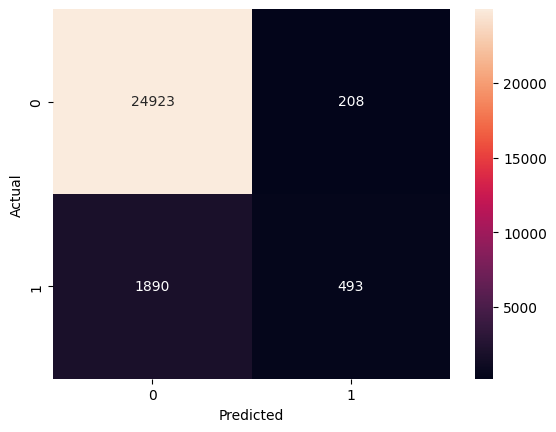

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

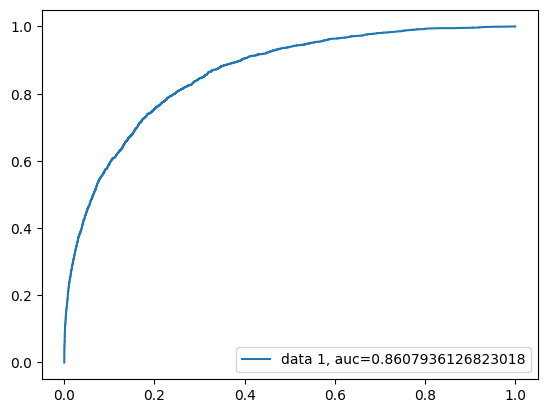

In [ ]:
# ROC curve
Y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Feature importance - SHAPley additives**

In [ ]:
import shap
from xgboost import XGBRegressor

In [ ]:
shap.initjs()

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, max_depth=1, learning_rate=0.1, random_state=0, enable_categorical=True)

In [ ]:
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [ ]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

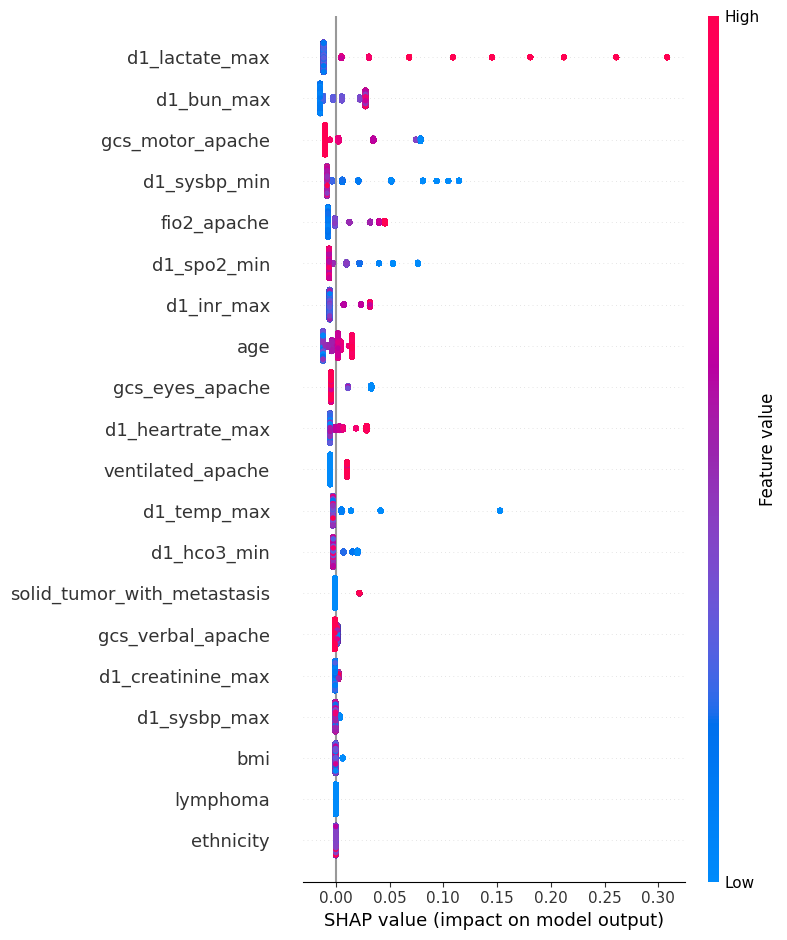

In [ ]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)